In [20]:
import numpy as np
import matplotlib.pyplot as plt 

# Number of Channels 
N = 10
N0 = 1 # Normalized noise level 
SNR_dB = 10 
P = 10 ** (SNR_dB/10) # Sum Power budgent defined via the SNR 

In [21]:
# The channel specific gains drawn from Gaussian distribution 
g = np.abs(np.random.randn(N, 1))

alpha_low = min(N0/g) # initial low
alpha_high = (P + np.sum(N0/g)) / N # Initial high 
stop_threshold = 1e-5
# alpha_low, alpha_high
step = 0
alphas = []
caps = []

6.472362392604372


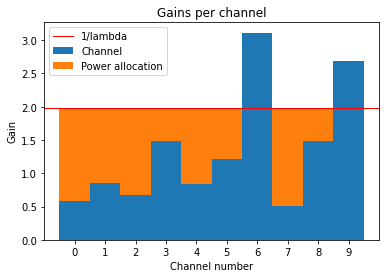

In [22]:

while(np.abs(alpha_low-alpha_high) > stop_threshold):
    alpha = (alpha_low + alpha_high) / 2 
    alphas.append(float(alpha))
    # solve the power allocation 
    p = 1/alpha - N0/g
    p[p < 0] = 0 
    # Test Sum-Power constraints 
    if (np.sum(p) > P):
        alpha_low = alpha 
    else: 
        alpha_high = alpha 
    step += 1 
    caps.append(np.sum(np.log(1 + g * p / N0)))
# Print the achievable rate in nats/s 
print(np.sum(np.log(1 + g * p / N0)))



plt.figure()
plt.bar(range(10), height=N0/g.squeeze(), width=1, label='Channel')
plt.bar(range(10), height= -1 * p.squeeze(), width=1, bottom=1/alpha, label='Power allocation')
plt.xticks(range(10))
plt.xlabel("Channel number")
plt.ylabel("Gain")
plt.title("Gains per channel")
plt.axhline(y=1 / alpha, color="r", linewidth=1, label='1/lambda')
plt.legend()
plt.show()

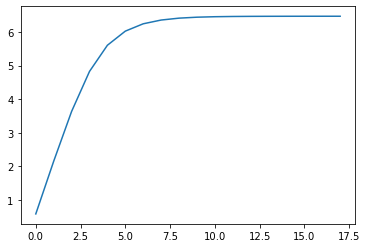

In [23]:
plt.figure()
plt.plot(caps)
plt.show()